<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_NLP_Power/blob/main/CLT_project_with_NLP_methodology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Concretness dictioanry
#### Brysbaert, Marc, Amy Beth Warriner, and Victor Kuperman. "Concreteness ratings for 40 thousand generally known English word lemmas." Behavior research methods 46 (2014): 904-911.



In [178]:
# concreteness word dictionary

import pandas as pd

# use unigram ones
dic_con = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/Joy_NLP_Power/main/data/Dic_Concretness.csv')
dict_conc = dic_con[dic_con.Bigram == 0][["Word", "Conc.M"]]

# use the average scores as scoring for the Corpus
# make all the words as lower
df_scores = dict_conc
df_scores = df_scores.rename(columns = {"Word":"word", "Conc.M":"score"})
df_scores["word"] = df_scores["word"].str.lower()
df_scores.sample(5)

,word,score
18909,longbow,4.96
25925,reconfiguration,2.14
29903,speechwriter,3.90
27283,rotting,3.48
34771,unreduced,2.21


# Enron Corpus and preprocessing

### spacy: without stopwords

### nltk: with stopwords

In [179]:
# preprocessed Enrone dataset

emails = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_NLP_Power/main/data/Enron_merged_df.csv")
s_emails = emails[["direction", "content"]]

In [180]:
# remove NaN
# more than two dots
# change the extraction 1) cant -> can not

s_emails = s_emails.fillna('')
s_emails['content'] = s_emails['content'].str.replace(r'\.{2,}', ' ', regex=True)
s_emails['cl_content'] = s_emails['content'].str.replace('cant', 'can not', regex=True)

s_emails.head(20)

,direction,content,cl_content
0,same,,
1,same,,
2,same,,
3,downward,i cant open this,i can not open this
4,downward,,
5,downward,peter berzins.,peter berzins.
6,same,Just an update: Today I set up a front month f...,Just an update: Today I set up a front month f...
7,same,no thanks.,no thanks.
8,same,Fine with me,Fine with me
9,same,Thanks anxiously awaiting,Thanks anxiously awaiting


In [181]:
# transform the month from abb to full

import spacy
nlp = spacy.load("en_core_web_sm")

month_mapping = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}

def replace_month_abbreviations(text):
    doc = nlp(text)
    for token in doc:
        if token.text in month_mapping:
            text = text.replace(token.text, month_mapping[token.text])
    return text

s_emails['cl_content'] = s_emails['cl_content'].apply(replace_month_abbreviations)

In [182]:
print(s_emails.loc[6, 'cl_content'])

Just an update: Today I set up a front month fixed price gas daily product 
priced at parity to NYMEX.  I thought the response was tremendous.  It really 
shows that we might have an angle to put out more of the curve and become the 
predominant benchmark for the industry rather than the exchange.  

One problem I had was linking 2 syncopated basis products.  I set up a new 
product for the prompt that was Novemberemberember GD/D Henry Hub that was a syncopated 
basis of 0/0 to the Novemberemberember Nymex.  However, since Decemberember Nymex is a syncopated 
basis to Novemberemberember Nymex, I could not set up a syncopated basis link around the Decemberember 
Nymex.  Any ideas?


In [183]:
def tokenize_and_remove_stopwords_and_punctuation(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.like_num]
    tokens = [token for token in tokens if token.strip()]
    return tokens

s_emails['tokens'] = s_emails['cl_content'].apply(tokenize_and_remove_stopwords_and_punctuation)


In [184]:
def capture_stopwords(text):
    doc = nlp(text)
    stopwords = [token.text.lower() for token in doc if token.is_stop and not token.like_num]
    stopwords = [stopword for stopword in stopwords if stopword.strip()]
    return stopwords

s_emails['stopwords'] = s_emails['cl_content'].apply(capture_stopwords)
s_emails["n_stopwords"] = s_emails["stopwords"].apply(len)

s_emails.head(10)

,direction,content,cl_content,tokens,stopwords,n_stopwords
0,same,,,[],[],0
1,same,,,[],[],0
2,same,,,[],[],0
3,downward,i cant open this,i can not open this,[open],"[i, can, not, this]",4
4,downward,,,[],[],0
5,downward,peter berzins.,peter berzins.,"[peter, berzin]",[],0
6,same,Just an update: Today I set up a front month f...,Just an update: Today I set up a front month f...,"[update, today, set, month, fix, price, gas, d...","[just, an, i, up, a, front, at, to, i, the, wa...",61
7,same,no thanks.,no thanks.,[thank],[no],1
8,same,Fine with me,Fine with me,[fine],"[with, me]",2
9,same,Thanks anxiously awaiting,Thanks anxiously awaiting,"[thank, anxiously, await]",[],0


In [185]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def clean_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token.lower() for token in tokens if token.isalnum()]
    return ' '.join(filtered_tokens)

s_emails['nltk_content'] = s_emails['cl_content'].apply(clean_text)
s_emails["words"] = s_emails["nltk_content"].apply(lambda text: text.split())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# match the scores for each tokens

In [186]:
def calculate_sum(word_list):
    relevant_scores = df_scores[df_scores['word'].isin(word_list)]['score']
    return relevant_scores.sum()


def calculate_average_score(word_list):
    relevant_scores = df_scores[df_scores['word'].isin(word_list)]['score']
    return relevant_scores.mean()

s_emails["token_total_score"] = s_emails["tokens"].apply(calculate_sum)
s_emails["token_avg_score"] = s_emails["tokens"].apply(calculate_average_score)
s_emails["token_avg_score"].fillna(0, inplace=True)

s_emails.head()

,direction,content,cl_content,tokens,stopwords,n_stopwords,nltk_content,words,token_total_score,token_avg_score
0,same,,,[],[],0,,[],0.00,0.00
1,same,,,[],[],0,,[],0.00,0.00
2,same,,,[],[],0,,[],0.00,0.00
3,downward,i cant open this,i can not open this,[open],"[i, can, not, this]",4,i can not open this,"[i, can, not, open, this]",3.21,3.21
4,downward,,,[],[],0,,[],0.00,0.00


In [187]:
def calculate_sum(word_list):
    relevant_scores = df_scores[df_scores['word'].isin(word_list)]['score']
    return relevant_scores.sum()


def calculate_average_score(word_list):
    relevant_scores = df_scores[df_scores['word'].isin(word_list)]['score']
    return relevant_scores.mean()

s_emails["words_total_score"] = s_emails["words"].apply(calculate_sum)
s_emails["words_avg_score"] = s_emails["words"].apply(calculate_average_score)
s_emails["words_avg_score"].fillna(0, inplace=True)

s_emails.head()

,direction,content,cl_content,tokens,stopwords,n_stopwords,nltk_content,words,token_total_score,token_avg_score,words_total_score,words_avg_score
0,same,,,[],[],0,,[],0.00,0.00,0.00,0.000
1,same,,,[],[],0,,[],0.00,0.00,0.00,0.000
2,same,,,[],[],0,,[],0.00,0.00,0.00,0.000
3,downward,i cant open this,i can not open this,[open],"[i, can, not, this]",4,i can not open this,"[i, can, not, open, this]",3.21,3.21,15.91,3.182
4,downward,,,[],[],0,,[],0.00,0.00,0.00,0.000


In [188]:
s_emails["stops_avg_score"] = s_emails["stopwords"].apply(calculate_average_score)
s_emails["stops_avg_score"].fillna(0, inplace=True)
s_emails["n_stopwords"] = s_emails["stopwords"].apply(len)


s_emails["n_words"] = s_emails["words"].apply(len)
s_emails["n_tokens"] = s_emails["tokens"].apply(len)


unique_diff_values = s_emails['stopwords'].explode().unique()
print(unique_diff_values)

[nan 'i' 'can' 'not' 'this' 'just' 'an' 'up' 'a' 'front' 'at' 'to' 'the'
 'was' 'it' 'really' 'that' 'we' 'might' 'have' 'put' 'out' 'more' 'of'
 'and' 'become' 'for' 'rather' 'than' 'had' 'however' 'since' 'is' 'could'
 'around' 'any' 'no' 'with' 'me' 'although' 'would' 'see' 'name' 'us'
 'how' 'about' 'if' 'on' 'being' 'what' 'will' 'be' 'across' 'all'
 'someone' 'by' 'call' 'as' 'much' 'most' 'enough' 'in' 'thus' 'into'
 'because' 'once' 'has' 'must' 'make' 'from' 'another' 'off' 'whereas'
 'they' 'both' 'may' 'either' 'or' 'their' 'alone' 'sometimes' 'ca' "n't"
 'so' 'do' 'are' "'s" 'still' 'very' 'them' 'your' 'you' 'when' "'d"
 'something' 'ever' 'but' 'does' 're' 'there' 'nothing' 'seems' 'take'
 'back' 'am' 'did' 'done' 'our' 'give' 'show' 'he' 'please' 'anyone'
 'further' 'get' 'anything' 'few' 'made' 'she' 'here' 'my' 'go'
 'somewhere' 'while' "'re" 'doing' 'who' 'then' 'without' 'such' 'same'
 'before' 'thereafter' 'becomes' 'after' 'until' 'its' 'which' 'under'
 'otherwise'

In [189]:
s_emails.head(30)

,direction,content,cl_content,tokens,stopwords,n_stopwords,nltk_content,words,token_total_score,token_avg_score,words_total_score,words_avg_score,stops_avg_score,n_words,n_tokens
0,same,,,[],[],0,,[],0.00,0.000000,0.00,0.000000,0.000000,0,0
1,same,,,[],[],0,,[],0.00,0.000000,0.00,0.000000,0.000000,0,0
2,same,,,[],[],0,,[],0.00,0.000000,0.00,0.000000,0.000000,0,0
3,downward,i cant open this,i can not open this,[open],"[i, can, not, this]",4,i can not open this,"[i, can, not, open, this]",3.21,3.210000,15.91,3.182000,3.175000,5,1
4,downward,,,[],[],0,,[],0.00,0.000000,0.00,0.000000,0.000000,0,0
5,downward,peter berzins.,peter berzins.,"[peter, berzin]",[],0,peter berzins,"[peter, berzins]",3.68,3.680000,3.68,3.680000,0.000000,2,2
6,same,Just an update: Today I set up a front month f...,Just an update: Today I set up a front month f...,"[update, today, set, month, fix, price, gas, d...","[just, an, i, up, a, front, at, to, i, the, wa...",61,just an update today i set up a front month fi...,"[just, an, update, today, i, set, up, a, front...",79.57,3.060385,149.89,2.498167,2.025455,114,53
7,same,no thanks.,no thanks.,[thank],[no],1,no thanks,"[no, thanks]",3.00,3.000000,4.60,2.300000,2.450000,2,1
8,same,Fine with me,Fine with me,[fine],"[with, me]",2,fine with me,"[fine, with, me]",2.61,2.610000,8.94,2.980000,3.165000,3,1
9,same,Thanks anxiously awaiting,Thanks anxiously awaiting,"[thank, anxiously, await]",[],0,thanks anxiously awaiting,"[thanks, anxiously, awaiting]",6.62,2.206667,4.23,2.115000,0.000000,3,3


# Statistical Test (ANOVA and Post-Hoc)







In [193]:
s_s_emails = s_emails[s_emails.words_total_score != 0]

                    sum_sq      df         F    PR(>F)
C(direction)  2.558454e+04     2.0  5.709257  0.003369
Residual      4.521569e+06  2018.0       NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
downward   same   3.5211 0.3492 -2.4435  9.4856  False
downward upward   8.9223 0.0023  2.6839 15.1608   True
    same upward   5.4013  0.088 -0.6018 11.4044  False
------------------------------------------------------





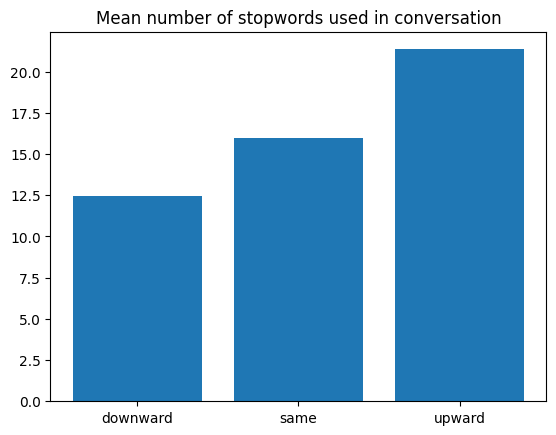

In [201]:
# nltk words list
# number of stopwords

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('n_stopwords ~ C(direction)', data=s_emails).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(s_emails["n_stopwords"], s_emails['direction'])
print(tukey_results)
print("\n\n")

# plotting
import matplotlib.pyplot as plt
means =s_emails.groupby('direction')['n_stopwords'].mean()
plt.bar(means.index, means.values)
plt.title("Mean number of stopwords used in conversation")
plt.show()

                    sum_sq      df         F    PR(>F)
C(direction)  4.249746e+04     2.0  4.842788  0.007977
Residual      8.854390e+06  2018.0       NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
downward   same   3.7421 0.5444 -4.6046 12.0888  False
downward upward  11.3566 0.0065  2.6266 20.0866   True
    same upward   7.6145 0.0849 -0.7861 16.0151  False
------------------------------------------------------





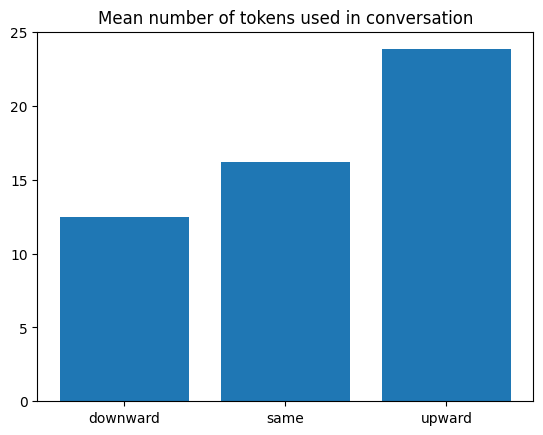

In [203]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('n_tokens ~ C(direction)', data=s_emails).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(s_emails["n_tokens"], s_emails['direction'])
print(tukey_results)
print("\n\n")

# plotting
import matplotlib.pyplot as plt
means =s_emails.groupby('direction')['n_tokens'].mean()
plt.bar(means.index, means.values)
plt.title("Mean number of tokens used in conversation")
plt.show()

                   sum_sq      df          F        PR(>F)
C(direction)    53.946687     2.0  18.887883  7.463258e-09
Residual      2881.858547  2018.0        NaN           NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
downward   same  -0.2609 0.0001 -0.4115 -0.1103   True
downward upward    0.124 0.1546 -0.0335  0.2815  False
    same upward    0.385    0.0  0.2334  0.5365   True
------------------------------------------------------





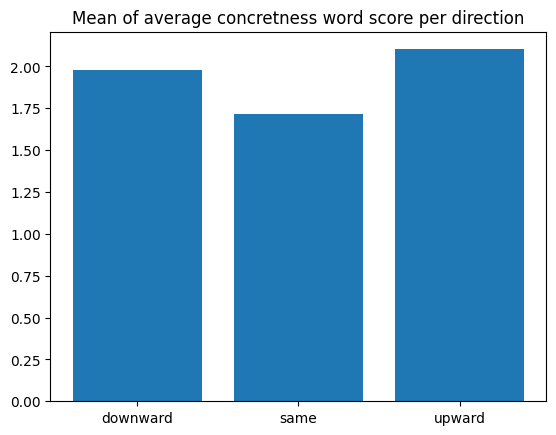

In [205]:
# nltk words list

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('words_avg_score ~ C(direction)', data=s_emails).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(s_emails["words_avg_score"], s_emails['direction'])
print(tukey_results)
print("\n\n")

# plotting
import matplotlib.pyplot as plt
means =s_emails.groupby('direction')['words_avg_score'].mean()
plt.bar(means.index, means.values)
plt.title("Mean of average concretness word score per direction")
plt.show()


                   sum_sq      df         F        PR(>F)
C(direction)    96.993574     2.0  24.14382  4.344679e-11
Residual      4053.481072  2018.0       NaN           NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
downward   same  -0.3524    0.0  -0.531 -0.1738   True
downward upward   0.1629 0.1018 -0.0239  0.3497  False
    same upward   0.5153    0.0  0.3356  0.6951   True
------------------------------------------------------





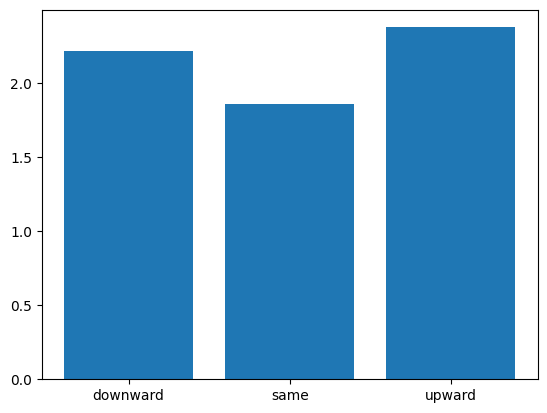

In [206]:
# spacy tokenization

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('token_avg_score ~ C(direction)', data=s_emails).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(s_emails["token_avg_score"], s_emails['direction'])
print(tukey_results)
print("\n\n")

# plotting
import matplotlib.pyplot as plt
means =s_emails.groupby('direction')['token_avg_score'].mean()
plt.bar(means.index, means.values)
plt.show()


<Axes: xlabel='is_stopword'>

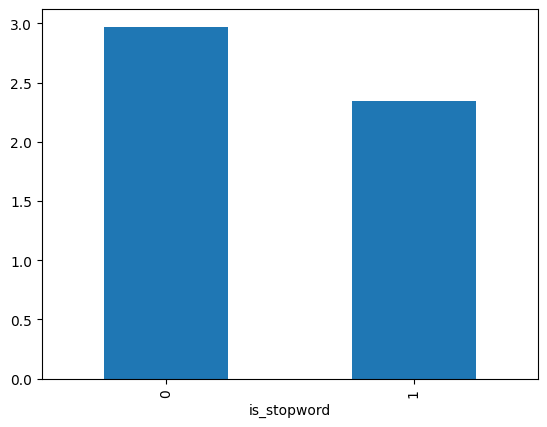

In [159]:
import spacy

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Get the list of English stopwords from spaCy
stopwords = list(nlp.Defaults.stop_words)

# Optionally, you can convert the stopwords to lowercase for consistency
stopwords = [word.lower() for word in stopwords]

df_scores['is_stopword'] = df_scores['word'].isin(stopwords).astype(int)

# Group by "is_stopword" and calculate the mean of "score"
grouped_scores = df_scores.groupby("is_stopword")["score"].mean()

# Create a bar plot
grouped_scores.plot(kind='bar')


                    sum_sq      df         F    PR(>F)
C(direction)  1.143164e+05     2.0  6.152855  0.002168
Residual      1.874662e+07  2018.0       NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
downward   same   6.3148 0.4417 -5.8302 18.4598  False
downward upward   18.664 0.0017  5.9613 31.3667   True
    same upward  12.3492  0.047  0.1258 24.5726   True
------------------------------------------------------





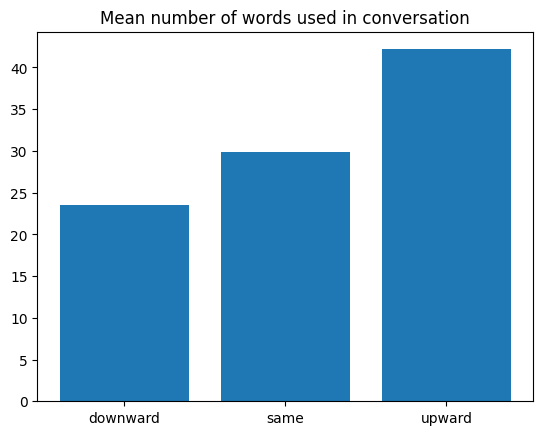

In [162]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('n_words ~ C(direction)', data=s_emails).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(s_emails["n_words"], s_emails['direction'])
print(tukey_results)
print("\n\n")

# plotting
import matplotlib.pyplot as plt
means =s_emails.groupby('direction')['n_words'].mean()
plt.bar(means.index, means.values)
plt.title("Mean number of words used in conversation")
plt.show()